In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
#LeNet Architecture

In [55]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [56]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

#55000 x 28 x 28 x 1 (1 for grey scale image), need that extra dimension
#not exactly sure why!

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [57]:
from functools import partial
#partial creates a function
#hyperbolic tangent

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_initializer = 'he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", kernel_initializer = 'he_uniform', padding="valid")
# build a two dimensional convolutional layer
# number of filters = 6, 5 = size of filter aka kernel_size, same --> feature maps is same as size of input, use 0 padding
model = tf.keras.models.Sequential([
    my_conv_layer(32,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(64,5),
    tf.keras.layers.AveragePooling2D(2),
    my_conv_layer(128,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(128),
    my_dense_layer(10, activation="softmax")
])
#Stride by default is 2!
#conv(120,5) is 1 x 1 x 120 because heading into teh layer we had a 5*5, 16*5?
#why must they be 84 and 10??

In [58]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 91s 2ms/sample - loss: 0.4543 - accuracy: 0.8403 - val_loss: 0.3354 - val_accuracy: 0.8856
Epoch 2/20
55000/55000 [==============================] - 89s 2ms/sample - loss: 0.3106 - accuracy: 0.8921 - val_loss: 0.3077 - val_accuracy: 0.8908
Epoch 3/20
55000/55000 [==============================] - 89s 2ms/sample - loss: 0.2683 - accuracy: 0.9070 - val_loss: 0.2742 - val_accuracy: 0.9068
Epoch 4/20
55000/55000 [==============================] - 90s 2ms/sample - loss: 0.2358 - accuracy: 0.9164 - val_loss: 0.2520 - val_accuracy: 0.9142
Epoch 5/20
55000/55000 [==============================] - 91s 2ms/sample - loss: 0.2133 - accuracy: 0.9261 - val_loss: 0.2455 - val_accuracy: 0.9156
Epoch 6/20
55000/55000 [==============================] - 93s 2ms/sample - loss: 0.1922 - accuracy: 0.9337 - val_loss: 0.2375 - val_accuracy: 0.9154
Epoch 7/20
55000/55000 [==============================] -

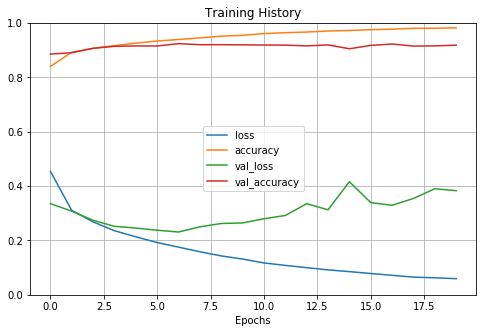

In [60]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('Training History')
plt.xlabel('Epochs')
plt.show()

In [61]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5491    0    8    8    1    0   35    0    0    0]
 [   0 5443    0    1    0    0    0    0    0    0]
 [  13    1 5385    8   57    0   32    0    0    0]
 [   3    2    2 5475   15    0    2    0    0    0]
 [   0    1   53   11 5389    0   58    0    0    0]
 [   0    0    0    0    0 5506    0    1    0    0]
 [ 176    1   57   24   23    0 5226    0    0    0]
 [   0    0    0    0    0    0    0 5480    0    8]
 [   1    0    1    2    0    0    1    0 5505    0]
 [   0    0    0    0    0    0    0   37    0 5457]]


In [62]:
model.evaluate(X_test,y_test) 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3887469037950039, 0.9175]

In [63]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[876   1  14  16   1   3  79   1   9   0]
 [  1 981   1  13   1   0   2   0   1   0]
 [ 19   1 884   8  35   0  51   0   2   0]
 [ 13   8  12 923  29   0  14   0   1   0]
 [  0   1  66  23 857   0  51   0   2   0]
 [  1   0   0   0   0 986   0  11   0   2]
 [125   2  56  19  54   0 739   0   5   0]
 [  0   0   0   0   0  10   0 979   0  11]
 [  4   0   0   4   1   4   4   1 982   0]
 [  1   0   0   0   0   6   0  25   0 968]]


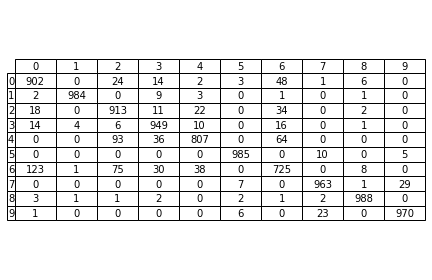

In [54]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')